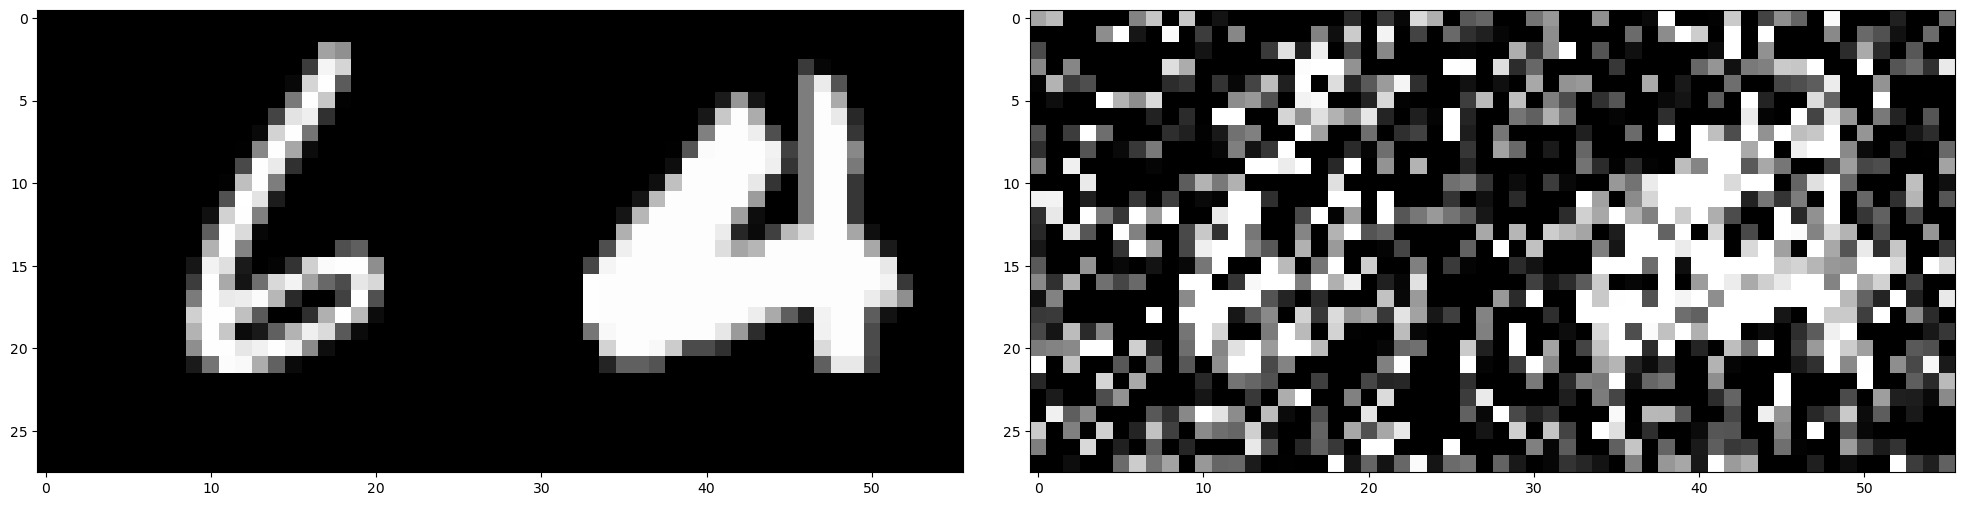

C:\Users\felin\Downloads\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.7960 - loss: 0.3472 - val_accuracy: 0.8048 - val_loss: 0.1483
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.8061 - loss: 0.1457 - val_accuracy: 0.8075 - val_loss: 0.1348
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.8080 - loss: 0.1351 - val_accuracy: 0.8077 - val_loss: 0.1296
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.8087 - loss: 0.1304 - val_accuracy: 0.8086 - val_loss: 0.1263
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.8094 - loss: 0.1270 - val_accuracy: 0.8095 - val_loss: 0.1236
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


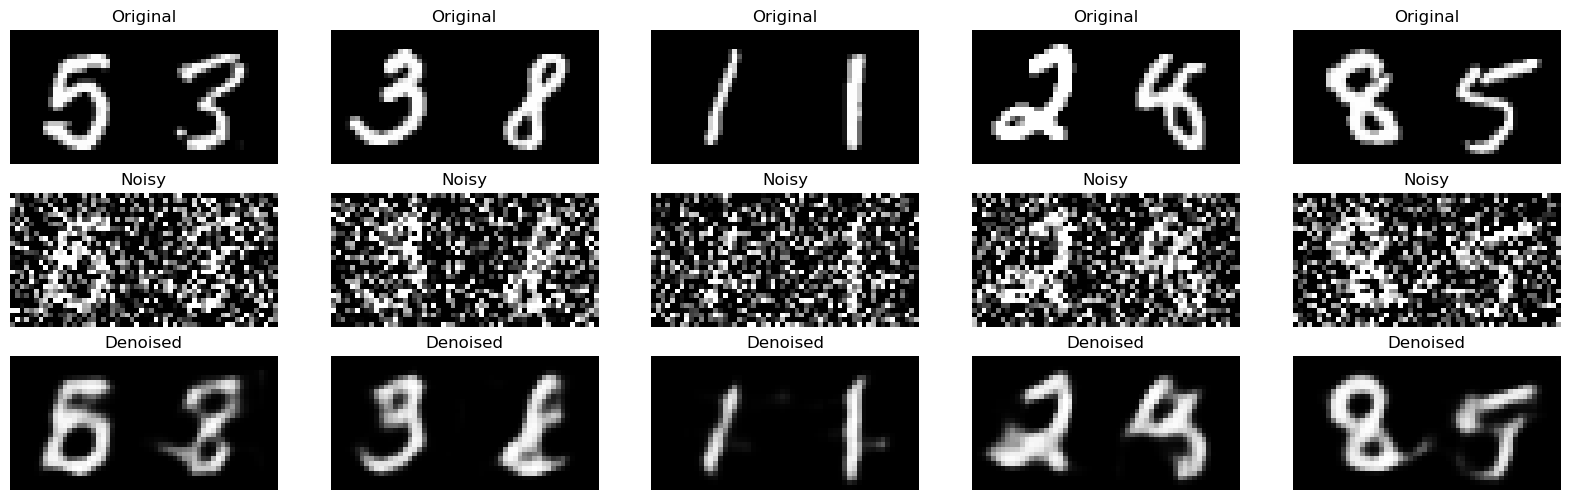

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D

# Load dataset
data = np.load(r'C:\Users\felin\Downloads\Image classification\mnist_compressed.npz')
X_train, X_test = data['train_images'], data['test_images']
y_train, y_test = data['train_labels'], data['test_labels']

# Normalize the data and add noise
X_train, X_test = X_train.astype('float32') / 255, X_test.astype('float32') / 255
noise_factor = 0.6
x_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

# Clip noisy images to ensure they stay in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape images for the model
X_train = X_train.reshape(-1, 28, 56, 1)
X_test = X_test.reshape(-1, 28, 56, 1)
x_train_noisy = x_train_noisy.reshape(-1, 28, 56, 1)
x_test_noisy = x_test_noisy.reshape(-1, 28, 56, 1)

# Display original and noisy images
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].imshow(X_train[0].reshape(28, 56), cmap='gray')
axes[1].imshow(x_train_noisy[0].reshape(28, 56), cmap='gray')
plt.tight_layout()
plt.show()

# Build the autoencoder model
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 56, 1)),
    MaxPool2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPool2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(1, 3, activation='sigmoid', padding='same')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_noisy, X_train, epochs=5, batch_size=256, validation_data=(x_test_noisy, X_test))

# Save the model
model.save('./denoise_2.keras')

# Denoise the test images
denoised_images = model.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 5  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 56), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 56), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 56), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()
